# Technology Abbreviations Generator

This notebook adds abbreviations for technologies in the `all_unique_technologies.csv` file and generates a new CSV file with technology abbreviations.

In [8]:
# Import required libraries
import pandas as pd
import re
import os

# Display settings for better visualization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")

Libraries imported successfully!


In [9]:
# Load the dataset from interim folder (it was generated in the interim folder)
try:
    df = pd.read_csv('../data/interim/all_unique_technologies.csv')
    print(f"Loaded {len(df)} technologies from interim folder")
except FileNotFoundError:
    # Try processed folder as an alternative
    df = pd.read_csv('../data/processed/all_unique_technologies.csv')
    print(f"Loaded {len(df)} technologies from processed folder")

# Display the first few rows
df.head()

Loaded 238 technologies from interim folder


,Technology
0,.NET (5+)
1,.NET Framework (1.0 - 4.8)
2,.NET MAUI
3,APT
4,ASP.NET


## Define Technology Abbreviation Mapping

Let's create a dictionary that maps technologies to their common abbreviations.

In [10]:
# Define abbreviations for common technologies
tech_abbrevs = {
    # Programming Languages
    "JavaScript": "JS",
    "TypeScript": "TS",
    "Python": "Py",
    "HTML/CSS": "HTML/CSS",  # Already abbreviated
    "C#": "C#",  # Already abbreviated
    "Bash/Shell (all shells)": "Shell",
    "Hypertext Preprocessor": "PHP",  # Full name not in list but adding just in case
    "PHP": "PHP",  # Already abbreviated
    "Cascading Style Sheets": "CSS",  # Full name not in list but adding just in case
    "Ruby": None,  # No common abbreviation
    "Go": "Go",  # No common abbreviation (sometimes "golang" but it's not shorter)
    "Swift": None,  # No common abbreviation
    "Kotlin": "Kt",
    "Rust": "Rs",
    "Objective-C": "ObjC",
    "Visual Basic (.Net)": "VB.NET",
    "Scala": None,  # No common abbreviation
    "Dart": None,  # No common abbreviation
    "MATLAB": "ML",
    "R": "R",  # Already abbreviated
    "Groovy": None,  # No common abbreviation
    
    # Frameworks & Libraries
    "React": "React",  # No common abbreviation
    "Angular": "Ng",
    "AngularJS": "AngJS",
    "Vue.js": "Vue", 
    "Django": None,  # No common abbreviation
    "Flask": None,  # No common abbreviation
    "jQuery": "$",  # Often represented by $ symbol
    "ASP.NET": "ASPNET",
    "ASP.NET CORE": "ASPNETCORE",
    "Laravel": None,  # No common abbreviation
    "Express": "Expr",
    "Spring Boot": "SprBt",
    "WordPress": "WP",
    "Next.js": "Next",
    "TensorFlow": "TF",
    "Node.js": "Node",
    "Pandas": "pd",
    "NumPy": "np",
    "React Native": "RN",
    "Flutter": None,  # No common abbreviation
    "Svelte": None,  # No common abbreviation
    "Blazor": None,  # No common abbreviation
    "Ruby on Rails": "RoR",
    "Xamarin": None,  # No common abbreviation
    "Spring Framework": "Spring",
    "Symfony": None,  # No common abbreviation
    "FastAPI": None,  # No common abbreviation
    "Ionic": None,  # No common abbreviation
    "NestJS": "Nest",
    "Electron": None,  # No common abbreviation
    "Gatsby": None,  # No common abbreviation
    "Torch/PyTorch": "PT",
    "Cordova": None,  # No common abbreviation
    
    # Databases
    "PostgreSQL": "PG",
    "MySQL": None,  # Already short
    "SQLite": None,  # Already short
    "MongoDB": "Mongo",
    "Microsoft SQL Server": "MSSQL",
    "Redis": None,  # Already short
    "MariaDB": None,  # No common abbreviation
    "Oracle": None,  # No common abbreviation
    "Elasticsearch": "ES",
    "Firebase Realtime Database": "FBRTDB",
    "Cosmos DB": "CDB",
    "DynamoDB": "DDB",
    "Cassandra": "Cass",
    "Snowflake": "SF",
    "H2": None,  # Already short
    "IBM DB2": "DB2",
    "Firebird": "FB",
    "Neo4J": None,  # Already short
    
    # Cloud Platforms
    "Amazon Web Services": "AWS",
    "Amazon Web Services (AWS)": "AWS",
    "Microsoft Azure": "Azure",
    "Google Cloud": "GCP",
    "Heroku": None,  # No common abbreviation
    "Firebase": "FB",
    "Oracle Cloud Infrastructure": "OCI",
    "Oracle Cloud Infrastructure (OCI)": "OCI",
    "Digital Ocean": "DO",
    "Netlify": None,  # No common abbreviation
    "Vercel": None,  # No common abbreviation
    "IBM Cloud Or Watson": "IBM Cloud",
    
    # Tools & Technologies
    "Docker": None,  # No common abbreviation
    "Kubernetes": "K8s",
    "Git": None,  # Already short
    "npm": None,  # Already short
    "Webpack": None,  # No common abbreviation
    "Visual Studio Code": "VSCode",
    "Jenkins": None,  # No common abbreviation
    "Terraform": "TF",
    "Ansible": None,  # No common abbreviation
    "GitHub Actions": "GH Actions",
    "Gradle": None,  # No common abbreviation
    "Maven": "MVN",
    "Maven (build tool)": "MVN",
    "Yarn": None,  # Already short
    "CircleCI": None,  # No common abbreviation
    "Apache Kafka": "Kafka",
    "Homebrew": "brew",
    "VMware": "VM",
    "Unity 3D": "Unity",
    "Unreal Engine": "UE",
    
        
    # Frameworks & Libraries - .NET Ecosystem
    ".NET (5+)": ".NET",
    ".NET Framework (1.0 - 4.8)": ".NET FW",
    ".NET MAUI": "MAUI",
    "Visual Studio Solution": "sln",
    "NuGet": None,  # No common abbreviation
    "MSBuild": None,  # No common abbreviation
    
    # Other technologies
    "OpenGL": "GL",
    "DirectX": "DX",
    "Raspberry Pi": "RPi", 
    "Rasberry Pi": "RPi",  # Handle common misspelling
    "Arduino": None,  # No common abbreviation
    "CMake": None,  # No common abbreviation
    "LLVM's Clang": "Clang",
    "CUDA": None,  # Already short
    "OpenCL": "CL",
    "RabbitMQ": "RMQ",
    "Apache Spark": "Spark",
    "Scikit-Learn": "sklearn",
    "Hugging Face Transformers": "HF",
    "Chocolatey": "choco",
    "Pacman": None,  # No common abbreviation
    "APT": None,  # Already short
    "Pip": None,  # Already short
    "Podman": None,  # No common abbreviation
    "Htmx": None,  # Already short
    "Tauri": None,  # Already short
    "Vite": None  # Already short
}

print(f"Defined {len(tech_abbrevs)} technology abbreviations")

Defined 131 technology abbreviations


## Add Abbreviations to the DataFrame

Now let's add a new column with the abbreviations, keeping null values for technologies that don't have common abbreviations.

In [11]:
# Function to get abbreviation for a technology
def get_abbreviation(tech_name):
    # First check direct mapping
    if tech_name in tech_abbrevs:
        return tech_abbrevs[tech_name]
    
    # Handle acronyms - if technology name has all uppercase letters, it's likely already an abbreviation
    if tech_name.isupper() and len(tech_name) <= 5:
        return None
    
    # Check if name is already short (<=3 chars)
    if len(tech_name) <= 3:
        return None
    
    # Special case for initialism detection (technologies like AWS, GCP, etc.)
    # If name contains multiple capital letters separated by spaces
    words = tech_name.split()
    if len(words) > 1:
        # Check if it might be an initialism (e.g., "Amazon Web Services" -> "AWS")
        possible_abbrev = ''.join([w[0].upper() for w in words if w[0].isalpha()])
        if len(possible_abbrev) >= 2 and possible_abbrev != tech_name:
            return possible_abbrev
    
    return None

# Apply the function to create the abbreviation column
df['abrv'] = df['Technology'].apply(get_abbreviation)

# Display the first few rows of the updated dataframe
print(f"Added abbreviations to {df['abrv'].notnull().sum()} technologies out of {len(df)}")
df.head(20)

Added abbreviations to 83 technologies out of 238


,Technology,abrv
0,.NET (5+),.NET
1,.NET Framework (1.0 - 4.8),.NET FW
2,.NET MAUI,MAUI
3,APT,None
4,ASP.NET,ASPNET
5,ASP.NET CORE,ASPNETCORE
6,Ada,None
7,Alibaba Cloud,AC
8,Amazon Web Services (AWS),AWS
9,Angular,Ng


## Verify Some Common Technology Abbreviations

In [12]:
# Let's check some important technologies and their abbreviations
important_techs = [
    "JavaScript", "Python", "Amazon Web Services (AWS)", "React", "MongoDB",
    "PostgreSQL", "Docker", "Kubernetes", "Angular", "TypeScript",
    "Node.js", "Microsoft SQL Server", "Spring Boot", ".NET (5+)", "TensorFlow"
]

# Filter the DataFrame for these technologies
sample_df = df[df['Technology'].isin(important_techs)]
sample_df

,Technology,abrv
0,.NET (5+),.NET
8,Amazon Web Services (AWS),AWS
9,Angular,Ng
60,Docker,None
106,JavaScript,JS
111,Kubernetes,K8s
130,Microsoft SQL Server,MSSQL
131,MongoDB,Mongo
140,Node.js,Node
163,PostgreSQL,PG


## Save the Updated DataFrame

Now let's save the dataframe with the abbreviations column to a new CSV file.

In [ ]:
# Create the processed directory if it doesn't exist
processed_dir = '../data/processed/'
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)
    print(f"Created directory: {processed_dir}")

# Save the DataFrame to a new CSV file
output_file = f"{processed_dir}technologies_with_abbreviations.csv"
df.to_csv(output_file, index=False)
print(f"Saved the DataFrame with abbreviations to {output_file}")



Saved the DataFrame with abbreviations to ../data/processed/technologies_with_abbreviations.csv


## Statistics on Abbreviations

Let's analyze what percentage of technologies have abbreviations and examine some patterns.

Total technologies: 238
Technologies with abbreviations: 83 (34.9%)
Technologies without abbreviations: 155 (65.1%)


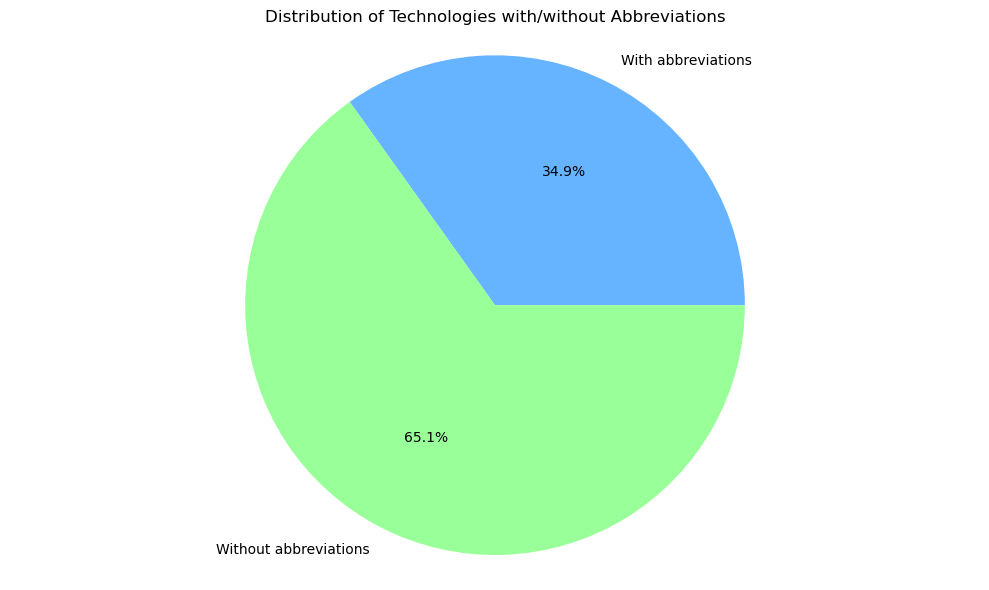

In [14]:
# Calculate statistics
total_techs = len(df)
techs_with_abbrev = df['abrv'].notnull().sum()
techs_without_abbrev = df['abrv'].isnull().sum()

print(f"Total technologies: {total_techs}")
print(f"Technologies with abbreviations: {techs_with_abbrev} ({techs_with_abbrev/total_techs:.1%})")
print(f"Technologies without abbreviations: {techs_without_abbrev} ({techs_without_abbrev/total_techs:.1%})")

# Create a pie chart to visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.pie([techs_with_abbrev, techs_without_abbrev], 
        labels=['With abbreviations', 'Without abbreviations'],
        autopct='%1.1f%%',
        colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Technologies with/without Abbreviations')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Conclusion

We have successfully added abbreviations to the technologies where commonly used abbreviations exist. The new CSV file includes a column called 'abrv' which contains the abbreviation if one exists, or null (NaN) if there is no common abbreviation.

This enhanced dataset can be useful for various applications in the CareerConnect project, such as displaying technology names more compactly in UI elements, improving search functionality, or for data processing where shorter identifiers might be preferable.